In [24]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

#csvfile = "Data_training.csv"  #file name 

file_name='actor4000'
csvfile = "Data_"+file_name+".pt.csv"  #file name 

In [25]:
data_test= pd.read_csv(csvfile)
#data_test= pd.read_csv('Data_training.csv')

In [239]:

data_training=pd.read_csv('Data_training.csv')
failed_training = data_training[data_training['Stop_Distance'] <= 0]
passed_training = data_training[data_training['Stop_Distance'] > 0]
print('Total number of episodes:',data_training['Episode'].shape[0])

print('Size of crashes :',failed_training.shape[0])  
print('Size of success :',passed_training.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed_training.shape[0]*100/(failed_training.shape[0]+passed_training.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed_training.shape[0]*100/(failed_training.shape[0]+passed_training.shape[0])),"%")
data_training.head()

Total number of episodes: 15000
Size of crashes : 2488
Size of success : 12512
Percentage of crash cases:16.59 %
Percentage of not crashed cases:83.41 %


,Episode,Kick_Speed,NN_start_speed,CRS_speed,location_of_patch,friction,Rewards,Stop_Distance
0,0,44.99,44.99,37.50,30.96,0.61,-524.54,0.24
1,1,21.11,21.11,37.50,35.04,0.38,-107.45,45.68
2,2,24.03,24.03,11.06,54.42,0.86,-1044.23,-0.06
3,3,8.30,8.30,11.06,62.87,0.37,-326.29,82.90
4,4,44.31,44.31,36.48,8.94,0.66,-608.79,0.01


In [26]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] > 0]
print('Total number of episodes:',data_test['Episode'].shape[0])
print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
data_test.head()

#failed.to_csv("crashed.csv",index=False)
#failed.head()

Total number of episodes: 4000
Size of crashes : 0
Size of success : 4000
Percentage of crash cases:0.00 %
Percentage of not crashed cases:100.00 %


,Episode,Kick_Speed,NN_start_speed,CRS_speed,location_of_patch,friction,Rewards,Stop_Distance
0,0,19.51,19.51,2.60,99.09,0.59,0.00,7.37
1,1,24.70,24.70,2.60,24.97,0.54,-152.84,55.14
2,2,22.60,22.60,2.61,16.16,0.53,0.00,7.25
3,3,30.36,30.36,2.61,13.33,0.48,-165.28,61.31
4,4,7.79,7.79,2.63,4.37,0.50,0.00,7.31


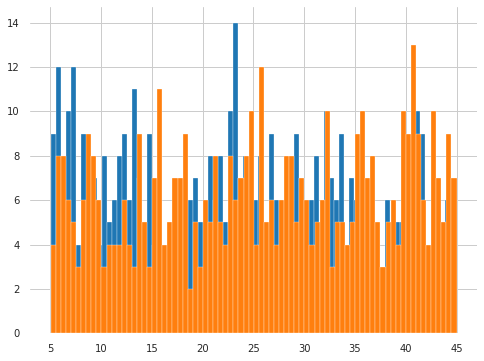

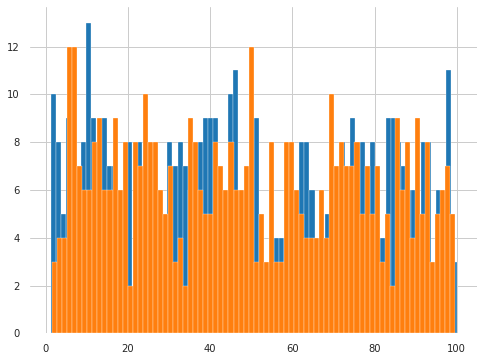

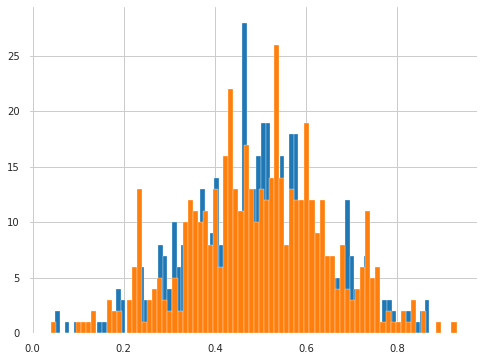

In [241]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()
fig = plt.figure(figsize=(8,6))
(data_test['NN_start_speed']).iloc[0:499].hist( bins=80)
#fig = plt.figure(figsize=(8, 6))
(data_training['NN_start_speed']).iloc[0:499].hist( bins=80)


fig = plt.figure(figsize=(8,6))

#fig = plt.figure(figsize=(8, 6))
data_training['location_of_patch'].iloc[0:499].hist( bins=80)
data_test['location_of_patch'].iloc[0:499].hist( bins=80)


fig = plt.figure(figsize=(8,6))
(data_test['friction']).iloc[0:499].hist( bins=80)
#fig = plt.figure(figsize=(8, 6))
(data_training['friction']).iloc[0:499].hist( bins=80)

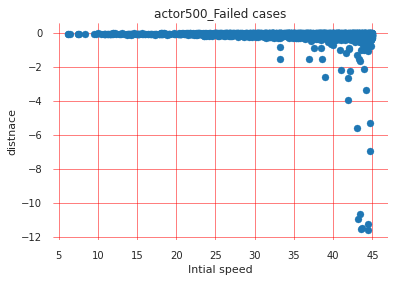

In [256]:
fig = plt.figure(figsize=(6,4))
plt.scatter(failed["NN_start_speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
title=file_name+"_Failed cases"
plt.title(title)
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

failure_fig='./images/'+file_name+"_fail.png"
fig.savefig(failure_fig, dpi=fig.dpi)

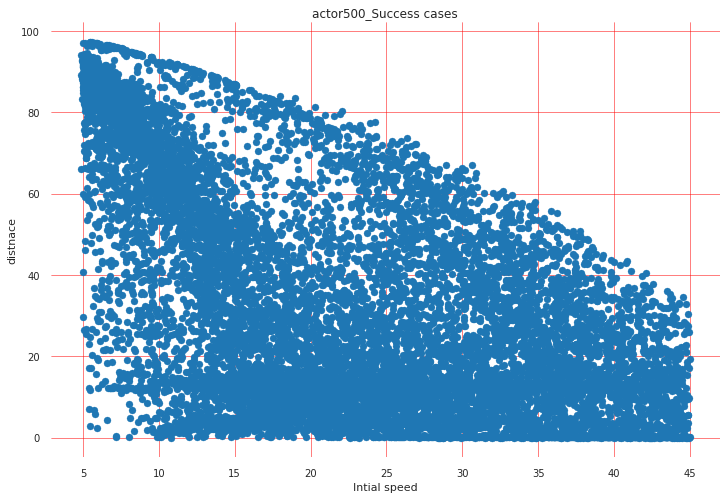

In [257]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(passed["NN_start_speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)

title=file_name+"_Success cases"
plt.title(title)
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()
failure_fig=csvfile+"failures"
plt.show()

success_fig='./images/'+file_name+"_pass.png"
fig.savefig(success_fig, dpi=fig.dpi)


In [258]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(0)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(1)
data_test.head()

,Episode,Kick_Speed,NN_start_speed,CRS_speed,location_of_patch,friction,Rewards,Stop_Distance,test
0,0,44.99,44.99,37.50,30.96,0.61,-524.54,0.24,1.0
1,1,21.11,21.11,37.50,35.04,0.38,-107.45,45.68,1.0
2,2,24.03,24.03,11.06,54.42,0.86,-1044.23,-0.06,0.0
3,3,8.30,8.30,11.06,62.87,0.37,-326.29,82.90,1.0
4,4,44.31,44.31,36.48,8.94,0.66,-608.79,0.01,1.0


Total number of episodes: 15000
Number of Pass: 12511
Number of fail: 2488


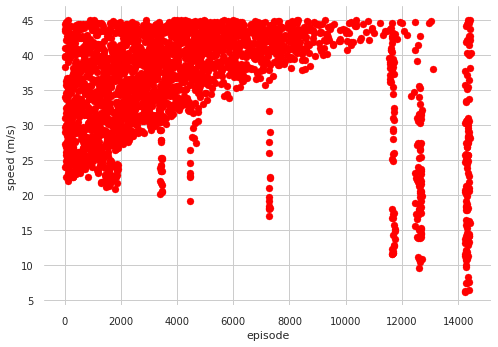

In [265]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=15000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['NN_start_speed'].values.tolist()[start:end])

indices = test == 1
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
#ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0, 45])
plt.xlabel('episode')
plt.ylabel('speed (m/s)')
ax.grid(True) 
plt.show()

Total number of episodes: 500
Number of Pass: 499
Number of fail: 0


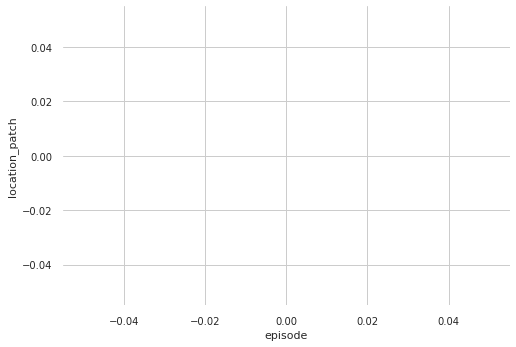

In [246]:

print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=5000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
loc_patch=np.array(data_test['location_of_patch'].values.tolist()[start:end])

indices = test == 1
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], loc_patch[~indices], c = 'red',label='fail')
# bad values
#ax.scatter(episode[indices], loc_patch[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0, 100])
plt.xlabel('episode')
plt.ylabel('location_patch')
ax.grid(True) 
plt.show()


Total number of episodes: 500
Number of Pass: 499
Number of fail: 0


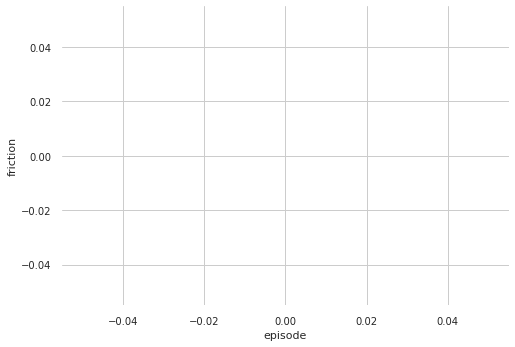

In [247]:

print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=15000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
friction=np.array(data_test['friction'].values.tolist()[start:end])

indices = test == 1
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], friction[~indices], c = 'red',label='fail')
# bad values
#ax.scatter(episode[indices], friction[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0, 45])
plt.xlabel('episode')
plt.ylabel('friction')
ax.grid(True) 
plt.show()

Failures:  [50, 42, 47, 41, 33, 44, 42, 37, 39, 35, 41, 36, 49, 34, 44, 45, 37, 33, 44, 32, 39, 38, 37, 38, 31, 34, 21, 25, 34, 30, 27, 30, 32, 37, 45, 23, 30, 27, 23, 31, 26, 22, 29, 23, 27, 31, 26, 32, 17, 21, 19, 23, 13, 19, 14, 14, 19, 14, 17, 13, 21, 16, 11, 13, 10, 6, 13, 17, 11, 11, 10, 10, 26, 10, 14, 9, 15, 7, 4, 8, 15, 7, 11, 6, 7, 8, 6, 4, 5, 2, 6, 3, 5, 5, 3, 3, 0, 2, 3, 1, 4, 5, 2, 4, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 9, 38, 14, 1, 1]


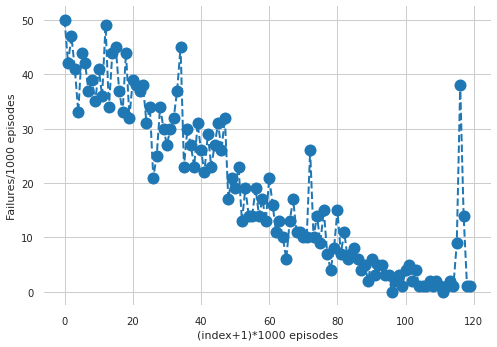

,Episode,Kick_Speed,NN_start_speed,CRS_speed,location_of_patch,friction,Rewards,Stop_Distance,test
0,0,44.99,44.99,37.50,30.96,0.61,-524.54,0.24,1.0
1,1,21.11,21.11,37.50,35.04,0.38,-107.45,45.68,1.0
2,2,24.03,24.03,11.06,54.42,0.86,-1044.23,-0.06,0.0
3,3,8.30,8.30,11.06,62.87,0.37,-326.29,82.90,1.0
4,4,44.31,44.31,36.48,8.94,0.66,-608.79,0.01,1.0


In [267]:
step=100
data_t=data_training.iloc[:12000]
data_t.loc[data_t['Stop_Distance'] <= 0, 'test'] = int(0)
data_t.loc[data_t['Stop_Distance'] > 0, 'test'] = int(1)

failure=[]
fig, ax = plt.subplots()
for i in range(int(data_t['Episode'].shape[0]/step)):
    start=step*i
    episode=np.array(data_t['Episode'].values.tolist()[start:start+step])
    test=np.array(data_t['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.shape[0]-indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show() 
data_t.head()

In [ ]:
"""

#data for AVF training:
iteration_start=6000
iteration_end=9000
data=data_test[["Episode", "Kick_Speed","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed"]].values,axis=0)
data[["Episode", "Kick_Speed"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

"""

In [ ]:
#AVF Training 
""""

X=data[["Episode","Kick_Speed"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(2,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;

"""

In [ ]:
#results = model.evaluate(x_test, y_test, batch_size=16)
#print('test loss, test acc:', results)

In [ ]:
"""
#sample x then pass it to AVF to find places which are most probable to fail
#here x is velocity
episode=8000
low_range_of_x= 2
high_range_of_x= 45
samples_of_x=np.transpose(2+43*np.random.uniform(size=32))
print(samples_of_x)
sampled_data=np.concatenate((np.array(episode),np.transpose(samples_of_x)),axis=1)
"""

In [ ]:
#predicted_y=model.predict(samples_of_x,batch_size=8)